In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
#EDA

In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df['Sales'].mask(df['Sales']<9.32, 0, inplace=True); df['Sales'].mask(df['Sales']>9.32, 1, inplace=True)

In [10]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [12]:
df['Sales'] = df["Sales"].astype('int')

In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [14]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [15]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Bad':0, 'Good':1, 'Medium':2})
df['Urban'] = df['Urban'].map({'Yes':1, 'No':0})
df['US'] = df['US'].map({'Yes':1, 'No':0})

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [17]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [18]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [19]:
predictors = colnames[1:]
target = colnames[0]

In [20]:
print('Target:',target,'\nPredictors:',predictors)

Target: Sales 
Predictors: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


In [21]:
X = df[predictors]
Y = df[target]

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators='warn',
    criterion='gini', oob_score=True)

In [24]:
np.shape(df)

(400, 11)

In [25]:
def filt(x):
    if x<= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [26]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filt)
df.pop('Sales')
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,High Sale
1,111,48,16,260,83,1,65,10,1,1,High Sale
2,113,35,10,269,80,2,59,12,1,1,High Sale
3,117,100,4,466,97,2,55,14,1,1,Low Sale
4,141,64,3,340,128,0,38,13,1,0,Low Sale


In [27]:
df.sales_cat.value_counts()

Low Sale     298
High Sale    102
Name: sales_cat, dtype: int64

In [28]:
#Label Encoding

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['sales_cat']= label_encoder.fit_transform(df['sales_cat'])
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [30]:
df.sales_cat.value_counts()
#Low Sale = 1
#High Sale = 0

1    298
0    102
Name: sales_cat, dtype: int64

In [31]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  sales_cat    400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [32]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.745000
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.436407
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,1.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.000000


In [33]:
#VISUALISNG THE COMPANY SALES

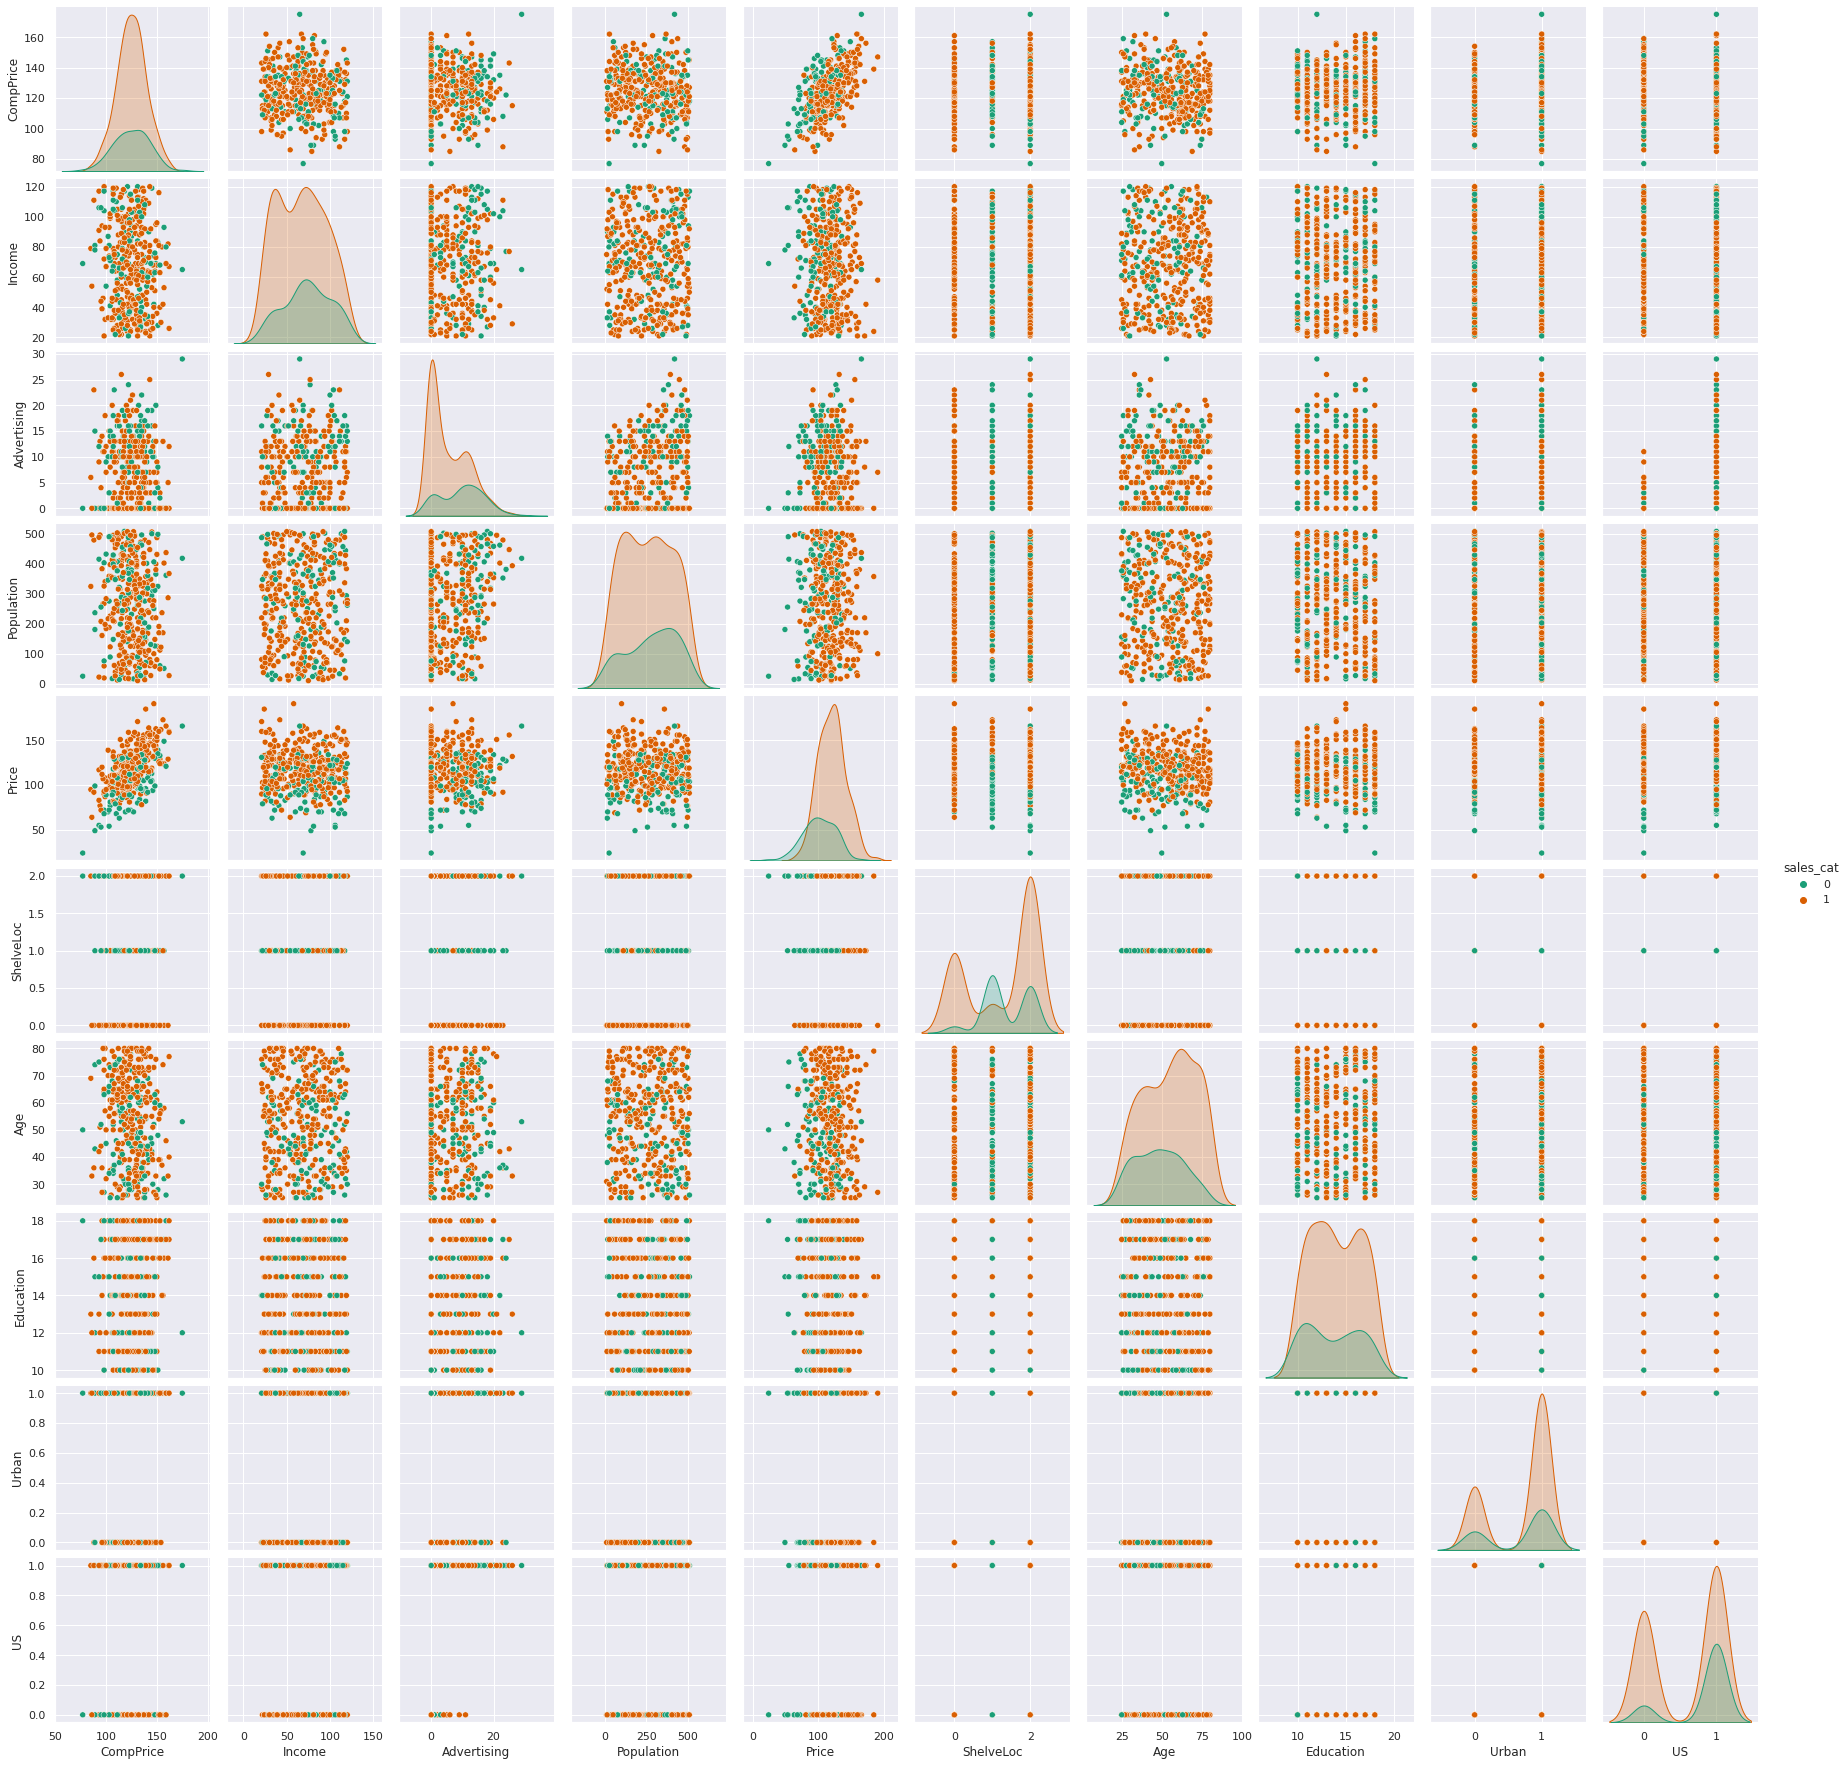

In [34]:
sns.pairplot(df,hue='sales_cat',palette='Dark2')

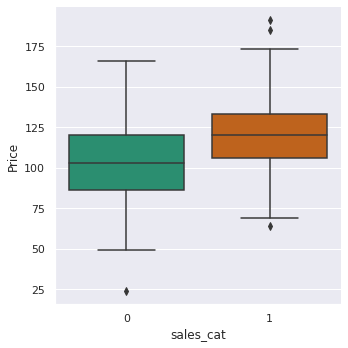

In [36]:
sns.catplot(x='sales_cat',y='Price',data=df,kind='box',palette='Dark2')

In [37]:
#Here we can clearly see the notches of Orange & Green boxes are not overlapping this means showing strong evidence that the medians differ so Orange box is going with High sales price.

In [38]:
pdata=df.copy()

In [39]:
x=pdata.iloc[:,0:-1]
y=pdata['sales_cat']

In [40]:
y.value_counts()

1    298
0    102
Name: sales_cat, dtype: int64

In [41]:
#Random Forest Building Model

In [42]:
#Train and Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [45]:
model =  RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [46]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [47]:
base_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [49]:
#Compared to previous CART values, this model is much better
confusion_matrix(y_test,base_pred)

array([[13, 10],
       [ 5, 52]])

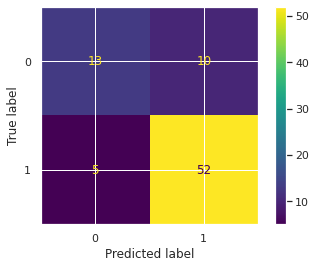

In [50]:
plot_confusion_matrix(model,x_test,y_test)

In [51]:
#All values have increased very well compared to CART values
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.84      0.91      0.87        57

    accuracy                           0.81        80
   macro avg       0.78      0.74      0.75        80
weighted avg       0.81      0.81      0.81        80



In [52]:
model.feature_importances_

array([0.08944712, 0.06624999, 0.11562411, 0.08918448, 0.28166701,
       0.11467701, 0.14539732, 0.05469302, 0.01398234, 0.0290776 ])

In [53]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 
#good dependence on Price,Income, CompPrice, Population and Age segments
#Least dependence on Urban and US segments 
#CART dependencies where much different as compared to this one.


,Feature Importance
CompPrice,0.089447
Income,0.066250
Advertising,0.115624
Population,0.089184
Price,0.281667
ShelveLoc,0.114677
Age,0.145397
Education,0.054693
Urban,0.013982
US,0.029078


In [54]:
#KFold Cross Validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,random_state=7)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.845


In [56]:
#Bagging Ensembeld Method

In [57]:
model1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)

In [58]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=model1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8375


In [59]:
#Adaboost Method

In [60]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=model1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8575000000000002


In [61]:
#Light Gradient Boosting Machine

In [62]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
d_train = lgb.Dataset(x_train, label=y_train)

In [64]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [65]:
clf = lgb.train(params, d_train, 100)

In [66]:
#Prediction
y_pred=clf.predict(x_test)

In [67]:
predictions = [round(value) for value in y_pred]

In [68]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7125

In [69]:
#XGBoost Classifier

In [70]:
from xgboost import XGBClassifier

In [71]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [73]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [74]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [75]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.75%


In [76]:
# evaluate predictions
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [78]:
#Accuracy: 100.00%
#Results:

#Here we can clearly see the notches of Orange & Green boxes are not overlapping this means showing strong evidence that     the medians differ so Orange box is going with High sales price.

#Here I applied many ensemble techniques and I got the high accuracy in XGBM for making best model in the company sales     dataset. 